In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\my\Downloads\Cleaned_Sales_data.csv")
df.head(10)

,Order Date,Year,Month,Customer Name,State,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1/3/2014,2014,1,Darren Powers,Texas,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2,5.55
1,1/4/2014,2014,1,Phillina Ober,Illinois,Office Supplies,Labels,Avery 508,11.78,3,4.27
2,1/4/2014,2014,1,Phillina Ober,Illinois,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,3,-64.77
3,1/4/2014,2014,1,Phillina Ober,Illinois,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2,-5.49
4,1/5/2014,2014,1,Mick Brown,Pennsylvania,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,3,4.88
5,1/6/2014,2014,1,Lycoris Saunders,California,Office Supplies,Paper,Xerox 225,19.44,3,9.33
6,1/6/2014,2014,1,Jack O'Briant,Georgia,Office Supplies,Art,"Dixon Prang Watercolor Pencils, 10-Color Set w...",12.78,3,5.24
7,1/6/2014,2014,1,Maria Etezadi,Kentucky,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.82,9,746.41
8,1/6/2014,2014,1,Maria Etezadi,Kentucky,Office Supplies,Binders,Ibico Hi-Tech Manual Binding System,609.98,2,274.49
9,1/6/2014,2014,1,Maria Etezadi,Kentucky,Office Supplies,Art,Rogers Handheld Barrel Pencil Sharpener,5.48,2,1.48


In [3]:
df.shape

(9993, 11)

In [7]:
df.drop_duplicates()

,Order Date,Year,Month,Customer Name,State,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1/3/2014,2014,1,Darren Powers,Texas,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2,5.55
1,1/4/2014,2014,1,Phillina Ober,Illinois,Office Supplies,Labels,Avery 508,11.78,3,4.27
2,1/4/2014,2014,1,Phillina Ober,Illinois,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,3,-64.77
3,1/4/2014,2014,1,Phillina Ober,Illinois,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2,-5.49
4,1/5/2014,2014,1,Mick Brown,Pennsylvania,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,3,4.88
...,...,...,...,...,...,...,...,...,...,...,...
9988,12/30/2017,2017,12,Patrick O'Donnell,New York,Technology,Phones,Gear Head AU3700S Headset,90.93,7,2.73
9989,12/30/2017,2017,12,Patrick O'Donnell,New York,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.78,3,19.79
9990,12/30/2017,2017,12,Erica Bern,California,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90,2,4.52
9991,12/30/2017,2017,12,Erica Bern,California,Office Supplies,Binders,GBC Binding covers,20.72,2,6.48


In [20]:
df.dropna(how="all", subset=None, inplace=True)

In [18]:
df["Customer Name"].value_counts(ascending=False,dropna=False)

Customer Name
William Brown        37
Matt Abelman         34
John Lee             34
Paul Prost           34
Jonathan Doherty     32
                     ..
Carl Jackson          1
Ricardo Emerson       1
Lela Donovan          1
Anthony O'Donnell     1
Jocasta Rupert        1
Name: count, Length: 793, dtype: int64

In [4]:
df.dtypes

Order Date        object
Year               int64
Month              int64
Customer Name     object
State             object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Profit           float64
dtype: object

In [5]:
df.isnull().sum()

Order Date       0
Year             0
Month            0
Customer Name    0
State            0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

In [45]:
c_df = df.select_dtypes(include="number")
c_df.corr()

,Year,Month,Sales,Quantity,Profit
Year,1.000000,-0.020364,-0.009667,-0.005934,0.004645
Month,-0.020364,1.000000,-0.000615,0.023264,-0.000522
Sales,-0.009667,-0.000615,1.000000,0.200808,0.479067
Quantity,-0.005934,0.023264,0.200808,1.000000,0.066241
Profit,0.004645,-0.000522,0.479067,0.066241,1.000000


In [27]:
Pivot_table = df.pivot_table(values='Sales',index='Year', columns='Month', aggfunc='sum')
print(Pivot_table)

Month        1         2         3         4         5         6         7   \
Year                                                                          
2014   14236.90   4519.92  55691.04  28013.98  23648.28  34595.14  33946.37   
2015   18174.08  11951.40  38726.26  34195.25  30131.72  24797.31  28765.32   
2016   18542.52  22978.82  51715.86  38750.04  56987.75  40344.54  39261.99   
2017   43971.37  20301.12  58872.35  36521.52  44261.08  52981.73  45264.43   

Month        8         9         10         11        12  
Year                                                      
2014   27909.47  81777.34  31453.37   78628.74  69545.64  
2015   36898.32  64595.87  31404.90   75972.51  74919.52  
2016   31115.35  73410.09  59687.80   79412.03  96999.07  
2017   63120.85  87866.66  77776.96  118447.81  83829.31  


In [93]:
df[df["Profit"] == df["Profit"].max()]

,Order Date,Year,Month,Customer Name,State,Category,Sub-Category,Product Name,Sales,Quantity,Profit
5774,10/2/2016,2016,10,Tamara Chand,Indiana,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,8399.98


In [77]:
df[df["Sales"] == df["Sales"].max()]

,Order Date,Year,Month,Customer Name,State,Category,Sub-Category,Product Name,Sales,Quantity,Profit
211,3/18/2014,2014,3,Sean Miller,Florida,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,-1811.08


In [78]:
df[df["Profit"] == df["Profit"].min()]

,Order Date,Year,Month,Customer Name,State,Category,Sub-Category,Product Name,Sales,Quantity,Profit
6277,11/25/2016,2016,11,Cindy Stewart,Ohio,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.99,5,-6599.98


In [79]:
df[df["Sales"] == df["Sales"].min()]

,Order Date,Year,Month,Customer Name,State,Category,Sub-Category,Product Name,Sales,Quantity,Profit
7777,6/19/2017,2017,6,Zuschuss Carroll,Texas,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.44,1,-1.11


In [6]:
#Top Sales with the same Top Profits
top_sales = df.nlargest(5, "Sales")
top_profit = df.nlargest(5, "Profit")
both = top_sales.index.intersection(top_profit.index)
df.loc[both]

,Order Date,Year,Month,Customer Name,State,Category,Sub-Category,Product Name,Sales,Quantity,Profit
5774,10/2/2016,2016,10,Tamara Chand,Indiana,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,8399.98
7108,3/23/2017,2017,3,Raymond Buch,Washington,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,6719.98
9325,11/17/2017,2017,11,Hunter Lopez,Delaware,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.97,3,5039.99


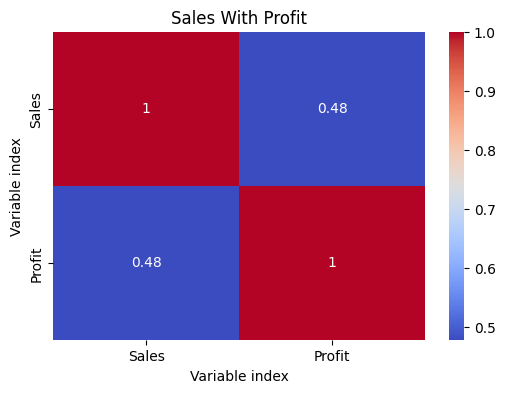

In [46]:
n_df = df[["Sales","Profit"]]
correlation = n_df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.title('Sales With Profit')
plt.ylabel('Variable index')
plt.xlabel('Variable index')
plt.show()
#Heatmap Shows that there was a positive correlation between sales and profit; Meaning that when sales increase, Profit also increase

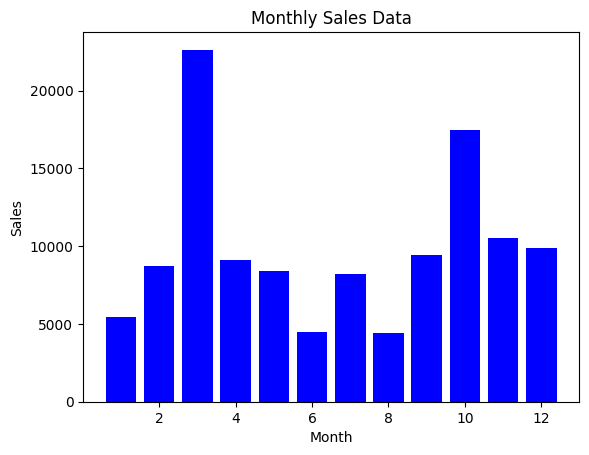

In [34]:
fig,ax = plt.subplots()
ax.bar(df["Month"],df["Sales"],color='blue',label='Monthly Sales')
ax.set_title('Monthly Sales Data')
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
plt.grid(False)
plt.show()

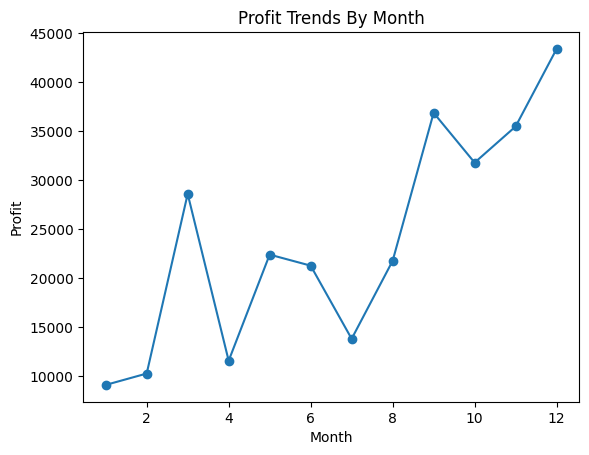

In [35]:
df_month = df.groupby("Month", as_index=False)["Profit"].sum()
df_month = df_month.sort_values("Month")
plt.plot(df_month["Month"],df_month["Profit"],marker="o",linestyle="-")
plt.title("Profit Trends By Month")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.grid(False)
plt.show()